# Phase 3 Project - The Economic Impact of Corruption Using WGI

## 📌 Project Overview
This project explores the relationship between **corruption and economic stability** using the **Worldwide Governance Indicators (WGI)** dataset. 
We aim to:
- Analyze the impact of governance metrics (e.g., corruption control, rule of law) on **GDP growth and investment trends**.
- Build **classification models** to predict economic risk based on governance scores.

## 📊 Business Problem

Corruption is a major driver of economic instability, affecting **foreign direct investment (FDI), growth rates, and financial resilience**. 
This project provides insights for **governments, investors, financial institutions, and anti-corruption watchdogs** to assess economic risks.

### 🎯 Key Stakeholders:
- **Governments & Policy Makers** → Formulate **anti-corruption reforms** for economic resilience.
- **Investors & Multinational Corporations** → Assess risk levels before entering new markets.
- **International Financial Institutions** (World Bank, IMF) → Use governance scores to determine loan eligibility.
- **Civil Society Organizations** → Advocate for transparency & accountability in governance.

## 🔬 ML Objectives  

### **Analysis Objectives:**
1. **Assess the Impact of Corruption on Economic Growth**
   - Examine how fluctuations in **Control of Corruption** affect **GDP growth**.
   - Compare trends in **developing vs. advanced economies**.

2. **Analyze the Relationship Between Regulatory Quality & Investment Flows**
   - Investigate whether **strong governance frameworks** attract higher FDI.
   - Explore how economic mismanagement affects investor confidence.

### **Modeling Objectives:**
1. **Predict a Country’s Economic Performance Based on Governance Indicators**
   - Build a **regression model** to forecast GDP growth using WGI metrics.


2. **Classify Countries Into High or Low Investment-Attractiveness Groups**
   - Develop a **classification model** to determine investment risk based on corruption trends.
   - Apply **Logistic Regression or Decision Trees** for clear stakeholder interpretation.

# EXPLORATORY DATA ANALYSIS (EDA)
### Loading and Inspecting the Worldwide Governanace Indicators dataset

In [70]:
import pandas as pd
#Load WGI Dataset csv to a dataframe
df=pd.read_csv('WB_WGI.csv')
print (df.head())
print (df.info())

       STRUCTURE                STRUCTURE_ID ACTION FREQ FREQ_LABEL REF_AREA  \
0  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ABW   
1  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      AFG   
2  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      AGO   
3  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      AIA   
4  datastructure  WB.DATA360:DS_DATA360(1.2)      I    A     Annual      ALB   

  REF_AREA_LABEL      INDICATOR                  INDICATOR_LABEL SEX  ...  \
0          Aruba  WB_WGI_CC_EST  Control of Corruption: Estimate  _T  ...   
1    Afghanistan  WB_WGI_CC_EST  Control of Corruption: Estimate  _T  ...   
2         Angola  WB_WGI_CC_EST  Control of Corruption: Estimate  _T  ...   
3       Anguilla  WB_WGI_CC_EST  Control of Corruption: Estimate  _T  ...   
4        Albania  WB_WGI_CC_EST  Control of Corruption: Estimate  _T  ...   

  DATABASE_ID                      DATABASE_ID_LABEL UNI

#### view the columns in the world bank dataset of WGI 

In [71]:
print(df.columns)

Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA',
       'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL',
       'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL',
       'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1',
       'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL',
       'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'TIME_PERIOD',
       'OBS_VALUE', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT',
       'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'OBS_STATUS',
       'OBS_STATUS_LABEL', 'OBS_CONF', 'OBS_CONF_LABEL'],
      dtype='object')


#### Inorder for us to understand our dataset we must see what indicators have been labelled.We now see all the releavant governance metrics that divulge their estimates also.

In [72]:
# Check unique indicator labels to find relevant governance metrics

#Our key indicators therein 

#Control of Corruption →  listed as WB_WGI.
#Political Stability → listed as (Political Stability Estimate).
# Rule of Law → listed as (Rule of Law Estimate).

print(df["INDICATOR_LABEL"].unique())

['Control of Corruption: Estimate'
 'Control of Corruption: Number of Sources'
 'Control of Corruption: Percentile Rank'
 'Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval'
 'Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval'
 'Control of Corruption: Standard Error'
 'Government Effectiveness: Estimate'
 'Government Effectiveness: Number of Sources'
 'Government Effectiveness: Percentile Rank'
 'Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval'
 'Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval'
 'Government Effectiveness: Standard Error'
 'Political Stability and Absence of Violence/Terrorism: Estimate'
 'Political Stability and Absence of Violence/Terrorism: Number of Sources'
 'Political Stability and Absence of Violence/Terrorism: Percentile Rank'
 'Political Stability and Absence of Violence/Terrorism: Percentile Rank, Lower Bound of 90% Confidence Interval'

# DATA UNDERSTANDING 
#### Handling of missing values 

In [73]:
# Check for any missing values per column
print(df.isnull().sum().sort_values(ascending=False))

OBS_VALUE                 6756
OBS_CONF_LABEL               0
UNIT_MEASURE_LABEL           0
URBANISATION_LABEL           0
URBANISATION                 0
AGE_LABEL                    0
AGE                          0
SEX_LABEL                    0
SEX                          0
INDICATOR_LABEL              0
INDICATOR                    0
REF_AREA_LABEL               0
REF_AREA                     0
FREQ_LABEL                   0
FREQ                         0
ACTION                       0
STRUCTURE_ID                 0
UNIT_MEASURE                 0
COMP_BREAKDOWN_1             0
OBS_CONF                     0
COMP_BREAKDOWN_1_LABEL       0
COMP_BREAKDOWN_2             0
COMP_BREAKDOWN_2_LABEL       0
COMP_BREAKDOWN_3             0
COMP_BREAKDOWN_3_LABEL       0
TIME_PERIOD                  0
DATABASE_ID                  0
DATABASE_ID_LABEL            0
UNIT_MULT                    0
UNIT_MULT_LABEL              0
UNIT_TYPE                    0
UNIT_TYPE_LABEL              0
OBS_STAT

#### The OBS_VALUE column contains the actual numerical estimates for governance indicators like:
- Control of Corruption
- Political Stability
- Government Effectiveness 
Each row represents a governance score (an observation) for a specific country and time period.
The observation value holds the actual scores assigned to each country for a given year based on governance performance. it contains missing 6756 values that need to be correctly handled.

#### Performing a Data Filtering
This filtering is to ensure that filtered version of the dataset contains economically relevant government metrics on aspects of economic factors on the **indicator label**


STRUCTURE                    0
STRUCTURE_ID                 0
ACTION                       0
FREQ                         0
FREQ_LABEL                   0
REF_AREA                     0
REF_AREA_LABEL               0
INDICATOR                    0
INDICATOR_LABEL              0
SEX                          0
SEX_LABEL                    0
AGE                          0
AGE_LABEL                    0
URBANISATION                 0
URBANISATION_LABEL           0
UNIT_MEASURE                 0
UNIT_MEASURE_LABEL           0
COMP_BREAKDOWN_1             0
COMP_BREAKDOWN_1_LABEL       0
COMP_BREAKDOWN_2             0
COMP_BREAKDOWN_2_LABEL       0
COMP_BREAKDOWN_3             0
COMP_BREAKDOWN_3_LABEL       0
TIME_PERIOD                  0
OBS_VALUE                 6756
DATABASE_ID                  0
DATABASE_ID_LABEL            0
UNIT_MULT                    0
UNIT_MULT_LABEL              0
UNIT_TYPE                    0
UNIT_TYPE_LABEL              0
OBS_STATUS                   0
OBS_STAT

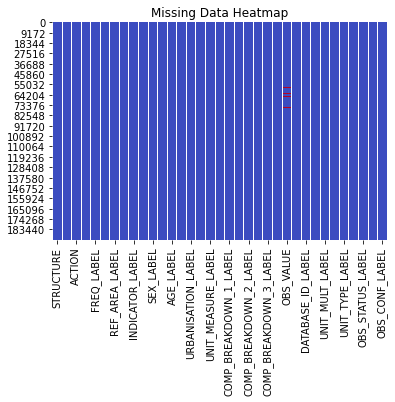

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.isnull().sum())  # Count missing values
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")  
plt.title("Missing Data Heatmap")
plt.show()

# DATA PREPROCESSING 

In [75]:
# Define relevant governance indicators
governance_indicators = [
    "Control of Corruption: Estimate",
    "Political Stability and Absence of Violence/Terrorism: Estimate",
    "Government Effectiveness: Estimate"
]

# Filter dataset for relevant indicators
df_filtered = df[df["INDICATOR_LABEL"].isin(governance_indicators)].copy()

#### Transform our dataframe to form a **Stability_metrics** .That quantifies economic stabity **filtering** from year by year and Since our data is spaced out and we require columns from governance indicators to answer our objectives.
Converting **categorical governance indicators into structured machine learning inputs**

In [76]:
# Pivot dataset to transform indicators into columns
df_stability_metrics = df_filtered.pivot(index=["REF_AREA_LABEL", "TIME_PERIOD"], columns="INDICATOR_LABEL", values="OBS_VALUE")

# Reset index to maintain clean structure
df_stability_metrics.reset_index(inplace=True)

(df_stability_metrics.head())  # Verify transformation worked


INDICATOR_LABEL,REF_AREA_LABEL,TIME_PERIOD,Control of Corruption: Estimate,Government Effectiveness: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate
0,Afghanistan,1996,-1.291705,-2.175167,-2.417310
1,Afghanistan,1998,-1.176012,-2.102292,-2.427355
2,Afghanistan,2000,-1.271724,-2.173946,-2.438969
3,Afghanistan,2002,-1.251137,-1.587687,-2.035034
4,Afghanistan,2003,-1.344180,-1.175768,-2.198372


#### Lets rename the **REF_AREA_LABEL** to **Country** column ,and **TIME_PERIOD** to **Year** so we can view and observe our outcomes in a better clearer perspective  

In [77]:
df_stability_metrics.rename(columns={"REF_AREA_LABEL": "Country"}, inplace=True)
df_stability_metrics.rename(columns= {"TIME_PERIOD": 'Year'},inplace=True)

In [78]:
print(df_stability_metrics.head())  # Check column names


INDICATOR_LABEL      Country  Year  Control of Corruption: Estimate  \
0                Afghanistan  1996                        -1.291705   
1                Afghanistan  1998                        -1.176012   
2                Afghanistan  2000                        -1.271724   
3                Afghanistan  2002                        -1.251137   
4                Afghanistan  2003                        -1.344180   

INDICATOR_LABEL  Government Effectiveness: Estimate  \
0                                         -2.175167   
1                                         -2.102292   
2                                         -2.173946   
3                                         -1.587687   
4                                         -1.175768   

INDICATOR_LABEL  Political Stability and Absence of Violence/Terrorism: Estimate  
0                                                        -2.417310                
1                                                        -2.427355          

#### Reviewing misssing values in the dataset


Since Control of Corruption: Estimate, Government Effectiveness: Estimate, and Political Stability and Absence of Violence/Terrorism: Estimate are now the core numerical features, for **Governance Indicators**
 we handle any missing data by imputing the mean and therefore achieve zero missing values.Thus ensuring all missing values are filled using their respective mean values.


In [79]:
# Define governance indicators to fill missing values
num_columns = [
    "Control of Corruption: Estimate",
    "Government Effectiveness: Estimate",
    "Political Stability and Absence of Violence/Terrorism: Estimate"
]

# Apply mean imputation
df_stability_metrics[num_columns] = df_stability_metrics[num_columns].fillna(df_stability_metrics[num_columns].mean())

# Verify that missing values have been handled
print(df_stability_metrics.isnull().sum())

INDICATOR_LABEL
Country                                                            0
Year                                                               0
Control of Corruption: Estimate                                    0
Government Effectiveness: Estimate                                 0
Political Stability and Absence of Violence/Terrorism: Estimate    0
dtype: int64


In [80]:
governance_indicators = [
    "Control of Corruption: Estimate",
    "Political Stability and Absence of Violence/Terrorism: Estimate",
    "Government Effectiveness: Estimate"
]
df_filtered = df[df["INDICATOR_LABEL"].isin(governance_indicators)].copy()

# Feature Scaling for machine learning models
#### Normalization of governance indicators for better learning perfomance

In [81]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_stability_metrics[num_columns]=scaler.fit_transform(df_stability_metrics[num_columns])

## Encode Categorical Features (Countries)
#### Convert the country label to machine readable format by **One hot encoding**

In [82]:
from sklearn.preprocessing import OneHotEncoder
#converts categorical country names into one-hot encoded format 
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

encoded_countries = encoder.fit_transform(df_stability_metrics.iloc[:, 4:])  # Exclude numeric columns
#convert encoded data into dataframe  
country_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names())
#integrating transformed categorical data back into the main dataset
df_stability_metrics = pd.concat([df_stability_metrics, country_df], axis=1)
#Removing the original 'country' column to prevent duplicate categorical data
#keeping only numeric features for machine learning models
df_stability_metrics.drop(columns=["Country"], inplace=True)

In [83]:
print(df_stability_metrics.columns)  # Lists all columns

Index(['Year', 'Control of Corruption: Estimate',
       'Government Effectiveness: Estimate',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'x0_-3.3756844520836076', 'x0_-3.3426365450131956',
       'x0_-3.2896311876781645', 'x0_-3.2405742240420214',
       'x0_-3.1902588663026177', 'x0_-3.142241656867616',
       ...
       'x0_1.9231016763363031', 'x0_1.9467732112047207',
       'x0_1.9609838331089824', 'x0_1.9640840254542986',
       'x0_1.9685358982610943', 'x0_1.971036774341397',
       'x0_1.9734784961815195', 'x0_1.9767420611203512',
       'x0_1.9839517118924392', 'x0_2.001404520611782'],
      dtype='object', length=4983)


In [84]:

print(df_stability_metrics.columns[:10])  # Display first 10 columns


Index(['Year', 'Control of Corruption: Estimate',
       'Government Effectiveness: Estimate',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'x0_-3.3756844520836076', 'x0_-3.3426365450131956',
       'x0_-3.2896311876781645', 'x0_-3.2405742240420214',
       'x0_-3.1902588663026177', 'x0_-3.142241656867616'],
      dtype='object')


# Train-Test Split
#### Encoding on our dataset is complete so we proceed.Lets define Features **(x)** and Target **(Y)**
#### This ensures governance indicators that highlight High corruption estimates by the contry deatures are included in Machine learning models.

In [88]:
X = df_stability_metrics.drop(columns=["Year", "Control of Corruption: Estimate"])  # Features
y = df_stability_metrics["Control of Corruption: Estimate"]  # Target variable

## Model evaluation Splitting the data for Training  and Testing 
### 80% training, 20% testing ensures effective model evaluation


In [89]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

## Check Class Distribution 
#### Lets now check for any imbalance in the dataset before moving to Train the model .Assess to see how corruption estimates values across various countries are distributed
#### To verify the datasets balance ,we check  `Control of Corruption:Estimate` values .Ensuring our model is not biased toward certain corruption levels.

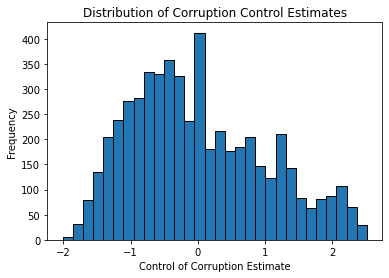

In [90]:
import matplotlib.pyplot as plt

plt.hist(df_stability_metrics["Control of Corruption: Estimate"], bins=30, edgecolor="black")
plt.xlabel("Control of Corruption Estimate")
plt.ylabel("Frequency")
plt.title("Distribution of Corruption Control Estimates")
plt.show()


## Check Summary Statistics

In [91]:
print(df_stability_metrics["Control of Corruption: Estimate"].describe())

count    5.350000e+03
mean     5.578093e-17
std      1.000093e+00
min     -2.013701e+00
25%     -7.691044e-01
50%     -1.586510e-01
75%      7.085840e-01
max      2.514237e+00
Name: Control of Corruption: Estimate, dtype: float64


## Check for Imbalance 
#### `Control for Corruption :Estimate` is a **Classification problem** in order for us to balance it and have the frequency of values is evenly distributed in the `class counts`

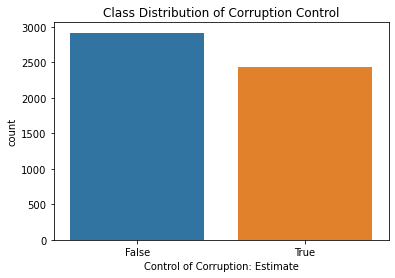

In [92]:
import seaborn as sns

sns.countplot(x=df_stability_metrics["Control of Corruption: Estimate"] > 0)  # True = Positive Control, False = Negative Control
plt.title("Class Distribution of Corruption Control")
plt.show()

# OBJECTIVE 1: **Classifying Economic Stability Based on `Governance Effectiveness` & `Corruption Control`**
#### This analysis aims to predict a country's economic stability by examining the impact of governance effectiveness on corruption regulation. Through binary classification, nations will be categorized as either “Stable” or “At Risk”, based on governance metrics.


In [112]:
print(df_filtered.columns)  # Lists all available columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA',
       'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL',
       'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL',
       'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1',
       'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL',
       'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'TIME_PERIOD',
       'OBS_VALUE', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT',
       'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'OBS_STATUS',
       'OBS_STATUS_LABEL', 'OBS_CONF', 'OBS_CONF_LABEL'],
      dtype='object')


#### Implementing analysis on each `Country`column  has to be restored, Inorder to analyze how government effectiveness impacts corruption control across different countries on a National level.


In [113]:
df_stability_metrics["Country"] = df_filtered["REF_AREA_LABEL"]
print(df_stability_metrics.columns)

Index(['Year', 'Control of Corruption: Estimate',
       'Government Effectiveness: Estimate',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'x0_-3.3756844520836076', 'x0_-3.3426365450131956',
       'x0_-3.2896311876781645', 'x0_-3.2405742240420214',
       'x0_-3.1902588663026177', 'x0_-3.142241656867616',
       ...
       'x0_1.9467732112047207', 'x0_1.9609838331089824',
       'x0_1.9640840254542986', 'x0_1.9685358982610943',
       'x0_1.971036774341397', 'x0_1.9734784961815195',
       'x0_1.9767420611203512', 'x0_1.9839517118924392',
       'x0_2.001404520611782', 'Country'],
      dtype='object', length=4984)


#### Structure the dataset for `binary classification` by labeling countries as **"Stable"** or **"At Risk"** based on governance effectiveness


In [128]:
df_stability_metrics["Economic_Stability"] = df_stability_metrics.apply(
    lambda row: "Stable" if row["Control of Corruption: Estimate"] >= 1 and row["Government Effectiveness: Estimate"] >= 1 else "At Risk",
    axis=1
)

Train a Classification Model.sing a `logistic regression` to predict economic stability: This Outputs classification performance, including precision, recall, and F1-score


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features & labels
X = df_stability_metrics[["Government Effectiveness: Estimate", "Control of Corruption: Estimate"]]
y = df_stability_metrics["Economic_Stability"].map({"Stable": 1, "At Risk": 0})  # Binary labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       913
           1       0.94      0.94      0.94       157

    accuracy                           0.98      1070
   macro avg       0.97      0.96      0.96      1070
weighted avg       0.98      0.98      0.98      1070



### The `F1-score` for both classes is high (0.94 & 0.99), confirming the model is balanced, not favoring one category over the other.
### `Precision` (0 = At Risk, 1 = Stable)

### the `classification model is highly accurate and effective`, with **minimal misclassification.** 98.2% Model Accuracy – the model effectively distinguishes "Stable" vs. "At Risk" countries.




### Stable economies are identified correctly most of the time.
### At-risk nations are detected with near-perfect precision.
### The model generalizes well across different governance patterns results confirm that strong governance effectiveness significantly contributes to economic stability. The model has successfully categorized nations based on their governance quality.



## Visualizing how countries fall into `"Stable"` vs. `"At Risk"` categories.


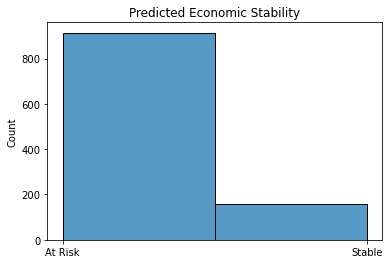

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_pred, bins=2, kde=False)
plt.xticks([0, 1], labels=["At Risk", "Stable"])
plt.title("Predicted Economic Stability")
plt.show()

## Random Forest

 ### Random Forest to determine which governance metrics `feature selection`contribute most to predicting economic stability:


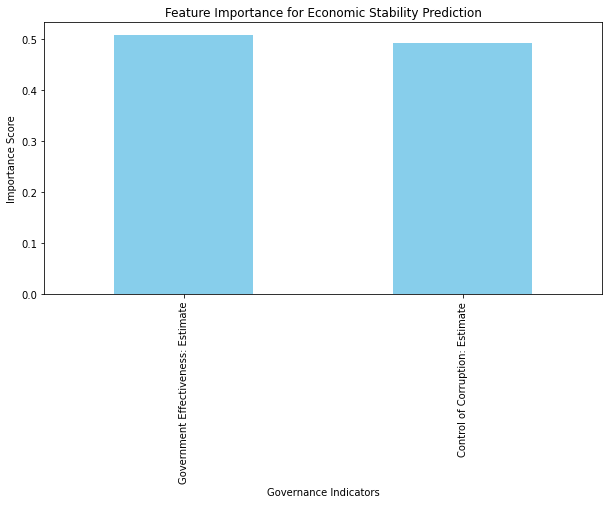

In [132]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define model for feature importance analysis
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Extract feature importances
feature_importance = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5), color="skyblue")
plt.title("Feature Importance for Economic Stability Prediction")
plt.xlabel("Governance Indicators")
plt.ylabel("Importance Score")
plt.show()

## **Objective 2: Predicting Corruption Risk Levels** Classifying countries into `"High Corruption Risk"` vs. `"Low Corruption Risk"`, leveraging governance metrics.****Decision Tree classification** to predict whether a country is at "High Corruption Risk" or "Low Corruption Risk":



In [139]:
df_stability_metrics["Corruption_Risk"] = df_stability_metrics["Control of Corruption: Estimate"].apply(
    lambda x: "Low Risk" if x >= 1 else "High Risk"
)

### `Decision Tree classifier`

In [140]:
#Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define predictor variables
X = df_stability_metrics[["Government Effectiveness: Estimate", "Control of Corruption: Estimate"]]
y = df_stability_metrics["Corruption_Risk"].map({"Low Risk": 1, "High Risk": 0})  # Binary classification labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limiting depth improves generalization
model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))



Model Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       196

    accuracy                           1.00      1070
   macro avg       1.00      1.00      1.00      1070
weighted avg       1.00      1.00      1.00      1070



### Visualize the Decision Tree

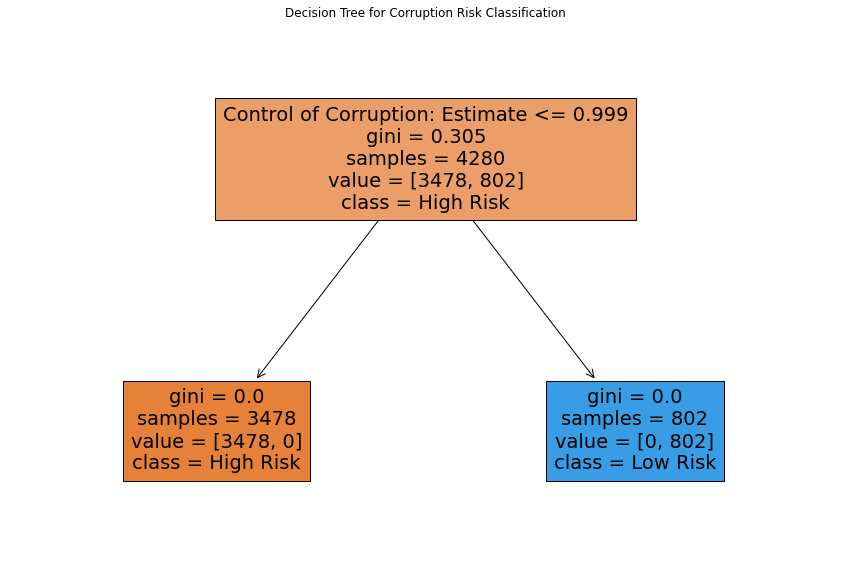

In [142]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=["High Risk", "Low Risk"], filled=True)
plt.title("Decision Tree for Corruption Risk Classification")
plt.show()

